<a href="https://colab.research.google.com/github/batlab-art/Introductions/blob/master/Course/OpenCV/2_OpenCV_Functions_and_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image stats and image processing
This notebook follows on from the fundamentals notebook.

This will introduce some simple stats, smoothing, and basic image processing.

But first let us include what we need to include and load up our test image.

<p>
 Estimated time needed: <strong>20 min</strong>
</p>

In [1]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py
# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

input_image=cv2.imread('noidea.jpg')

--2021-10-03 10:50:16--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70503 (69K) [image/jpeg]
Saving to: ‘noidea.jpg’

noidea.jpg          100%[===================>]  68.85K  --.-KB/s    in 0.007s  

2021-10-03 10:50:16 (9.07 MB/s) - ‘noidea.jpg’ saved [70503/70503]

--2021-10-03 10:50:16--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

## Basic manipulations

Rotate, flip... 

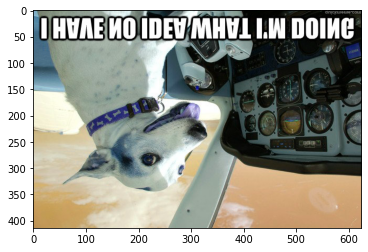

In [2]:
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0)

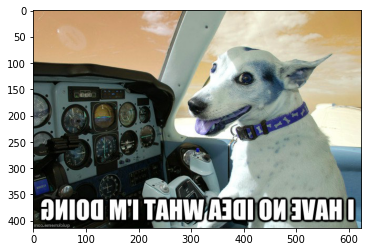

In [3]:
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1)

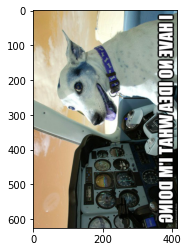

In [4]:
transposed=cv2.transpose(input_image)
plt.imshow(transposed)

## Stylization


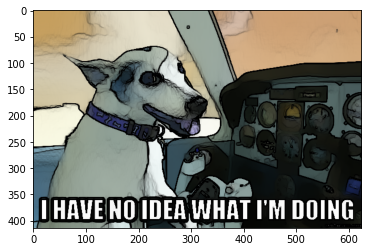

In [5]:
res = cv2.stylization(input_image, sigma_s=60, sigma_r=0.6)
# sigma_s controls the size of the neighborhood. Range 1 - 200
# sigma_r controls the how dissimilar colors within the neighborhood will be averaged. A larger sigma_r results in large regions of constant color. Range 0 - 1

plt.imshow(res)

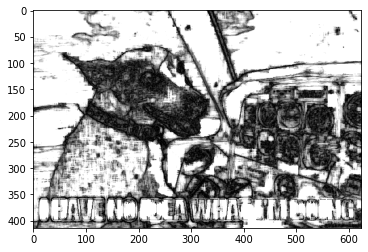

In [6]:
dst_gray, dst_color = cv2.pencilSketch(input_image, sigma_s=80, sigma_r=0.07, shade_factor=0.05) 
# sigma_s and sigma_r are the same as in stylization.
# shade_factor is a simple scaling of the output image intensity. The higher the value, the brighter is the result. Range 0 - 0.1

plt.imshow(dst_gray, cmap='gray')

## Minimum, maximum

To find the min or max of a matrix, you can use minMaxLoc. This takes a single channel image (it doesn't make much sense to take the max of a 3 channel image). So in the next code snippet you see a for loop, using python style image slicing, to look at each channel of the input image separately. 

In [7]:
for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(input_image[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))


min 0.0 is at (175, 117), and max 255.0 is at (577, 37)
min 0.0 is at (446, 146), and max 255.0 is at (257, 81)
min 0.0 is at (524, 122), and max 255.0 is at (257, 81)


## Arithmetic operations on images

OpenCV has a lot of functions for doing mathematics on images. Some of these have "analogous" numpy alternatives, but it is nearly always better to use the OpenCV version. The reason for this that OpenCV is designed to work on images and so handles overflow better (OpenCV add, for example, truncates to 255 if the datatype is image-like and 8 bit; Numpy's alternative wraps around).

Useful arithmetic operations include add and addWeighted, which combine two images that are the same size. 

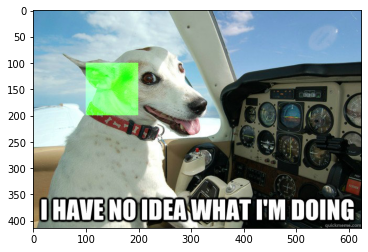

In [8]:
#First create an image the same size as our input
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[100:200,100:200,1]=255; #give it a green square

new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

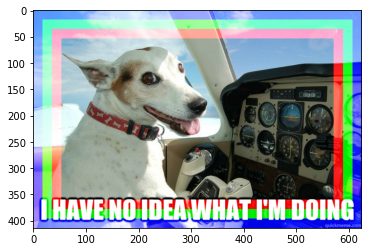

In [9]:
#First create an image the same size as our input
blank_image = np.zeros((input_image.shape), np.uint8)

def pixel_frame (img,swidth,offset,channel, opacity):
    height, width, channels = img.shape
    opacity = 255*opacity

    img[offset:height-offset,offset:width-offset,channel] = opacity; # Fill A Square
    img[offset+swidth:height-offset-swidth,offset+swidth:width-offset-swidth,channel] = 0; # Delete Center
    return img

width = 18
for channel in range(3):
  pixel_frame(blank_image, width, width*channel, channel % 3, 0.9)

new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

## Upload file 1
Run the code block and click **Choose Files** after uploading the file name will be saved to a variable named filename

In [10]:
#@title
from google.colab import files

uploaded = files.upload()
uploaded_file_name = ''

filename = next(iter(uploaded))
filename

Saving _111434467_gettyimages-1143489763.jpg to _111434467_gettyimages-1143489763.jpg


'_111434467_gettyimages-1143489763.jpg'

### Use our frame code on the uploaded image

91


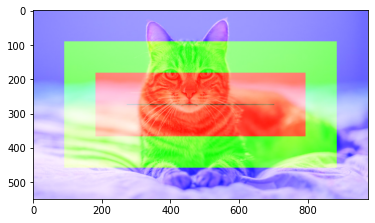

In [11]:
input2_image=cv2.imread(filename)
blank_image = np.zeros((input2_image.shape), np.uint8)
height, width, channels = input2_image.shape

f_count = 3

if width > height:
  stroke = height // 2 // f_count
else:
  stroke = width // 2 // f_count

print(stroke)

for i in range(f_count):
  pixel_frame(blank_image, stroke, stroke * i, i % 3, 0.9)

new_image = cv2.add(blank_image,input2_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

## Upload file 2
Run the code block and click **Choose Files** after uploading the file name will be saved to a variable named filename2

In [12]:
#@title
from google.colab import files

uploaded = files.upload()
uploaded_file_name = ''

filename2 = next(iter(uploaded))
filename2

Saving Cerberus.png to Cerberus.png


'Cerberus.png'

### Blend Images
the code loads both image, resizes the second image to fit to the first image dimensions, and then runs addWeighted to blend the images according to the opacity alpha parameter

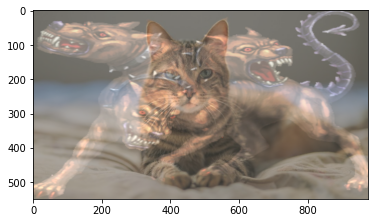

In [13]:
def loadAndBlendImage (file1, file2, alpha):
  # [load]
    src1 = cv2.imread(file1)
    src2 = cv2.imread(file2)
  # [blend_images]
    row1,cols1, ch1 = src1.shape

    src2Resized = cv2.resize(src2 , (cols1,row1)) # match src2 size to size1

    dst = cv2.addWeighted(src1, alpha, src2Resized, 1 - alpha ,44)
    return dst

result = loadAndBlendImage(filename,filename2,.5)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

### mix and burn images
**This will work best if your second image has a white background**

The function adds two files by masking the second image white values and adding it to the first image

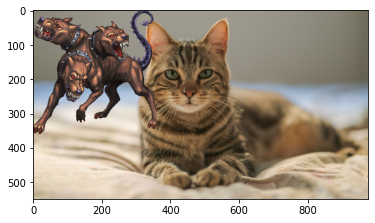

In [14]:
def mix_and_burn(file1,file2):
  # Load two images
  img1 = cv2.imread(file1)
  img2 = cv2.imread(file2)

  # I want to put logo on top-left corner, So I create a ROI
  rows,cols,channels = img2.shape
  roi = img1[0:rows, 0:cols ]

  # Now create a mask of logo and create its inverse mask also
  img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
  ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
  mask_inv = cv2.bitwise_not(mask)

  # Now black-out the area of logo in ROI
  img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

  # Take only region of logo from logo image.
  img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

  # Put logo in ROI and modify the main image
  dst = cv2.add(img1_bg,img2_fg)
  img1[0:rows, 0:cols ] = dst

  return img1

result = mix_and_burn(filename,filename2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

## Noise reduction
Noise reduction usually involves blurring/smoothing an image using a Gaussian kernel.
The width of the kernel determines the amount of smoothing.

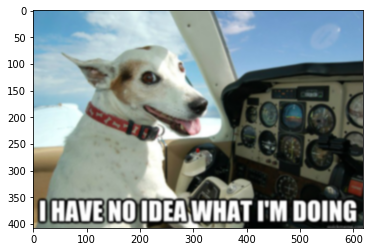

In [15]:
d=3
img_blur3 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur3, cv2.COLOR_BGR2RGB))

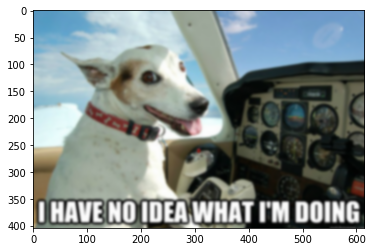

In [16]:
d=5
img_blur5 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur5, cv2.COLOR_BGR2RGB))

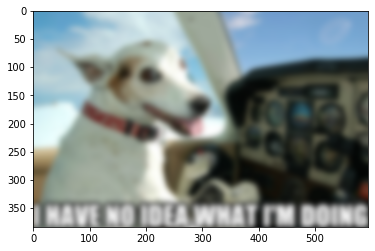

In [17]:
d=15
img_blur15 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur15, cv2.COLOR_BGR2RGB))

## Edges

Edge detection is the final image processing technique we're going to look at in this tutorial.

For a lot of what we think of as "modern" computer vision techniques, edge detection functions as a building block. Much edge detection actually works by **convolution**, and indeed **convolutional neural networks** are absolutely the flavour of the month in some parts of computer vision. Sobel's edge detector was one of the first truly successful edge detection (enhancement) technique and that involves convolution at its core. You can read more about the background to Sobel here in the OpenCV docs [here](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html). 

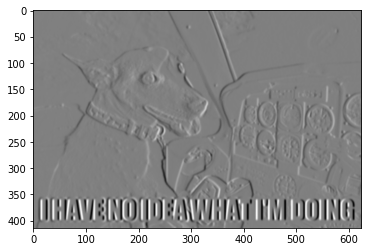

In [18]:
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap = 'gray') 
# Sobel works in x and in y, change sobelx to sobely in the olt line above to see the difference


Canny edge detection is another winnning technique - it takes two thresholds.
The first one determines how likely Canny is to find an edge, and the second determines how likely it is to follow that edge once it's found. Investigate the effect of these thresholds by altering the values below.

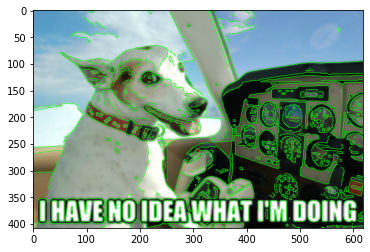

In [19]:
th1=30
th2=60 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
d=3 # gaussian blur

edgeresult=input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

## Convolution

[Image kernels explained visually](https://setosa.io/ev/image-kernels/)

---

![](https://editor.analyticsvidhya.com/uploads/78633R.gif)

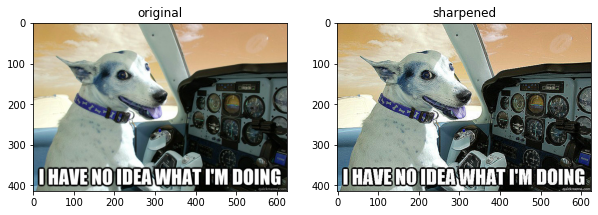

In [35]:
# construct a sharpening filter
sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

sharpened = cv2.filter2D(input_image, -1, sharpen)

fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].title.set_text('original')
ax[0].imshow(input_image)
ax[1].title.set_text('sharpened')
ax[1].imshow(sharpened)


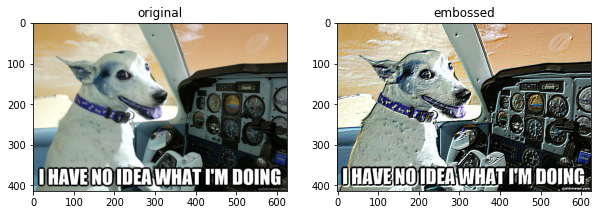

In [34]:
# construct a sharpening filter
emboss = np.array((
	[-2, -1, 0],
	[-1, 1, 1],
	[0, 1, 2]), dtype="int")

embossed = cv2.filter2D(input_image, -1, emboss)

fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].title.set_text('original')
ax[0].imshow(input_image)
ax[1].title.set_text('embossed')
ax[1].imshow(embossed)

## Functions Covered
filtered = cv2.filter2D( image, )

# Assigment


[Previous](1-Fundamentals.ipynb) [Next](3-Features.ipynb)